## Link to Colab

https://colab.research.google.com/drive/1koHAuv99pQ5NghLu7saobjUFoaQK800D#scrollTo=aGFgYjwkkwn7

## Load raw data

In [1]:
!unzip /content/face_exp_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: face_exp_data/img_data/val/happy/32046.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._32046.jpg  
  inflating: face_exp_data/img_data/val/happy/30651.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._30651.jpg  
  inflating: face_exp_data/img_data/val/happy/29300.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._29300.jpg  
  inflating: face_exp_data/img_data/val/happy/7815.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._7815.jpg  
  inflating: face_exp_data/img_data/val/happy/29467.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._29467.jpg  
  inflating: face_exp_data/img_data/val/happy/32047.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._32047.jpg  
  inflating: face_exp_data/img_data/val/happy/29329.jpg  
  inflating: __MACOSX/face_exp_data/img_data/val/happy/._29329.jpg  
  inflating: face_exp_data/img_data/val/happy/25275.jpg  
  in

In [ ]:
# find . -name "*.DS_Store" -type f -delete

### Load some images from three dataset

Train:

happy
surprise
angry


<ipython-input-10-02e51dd9c463>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,cpt)


sad
fear


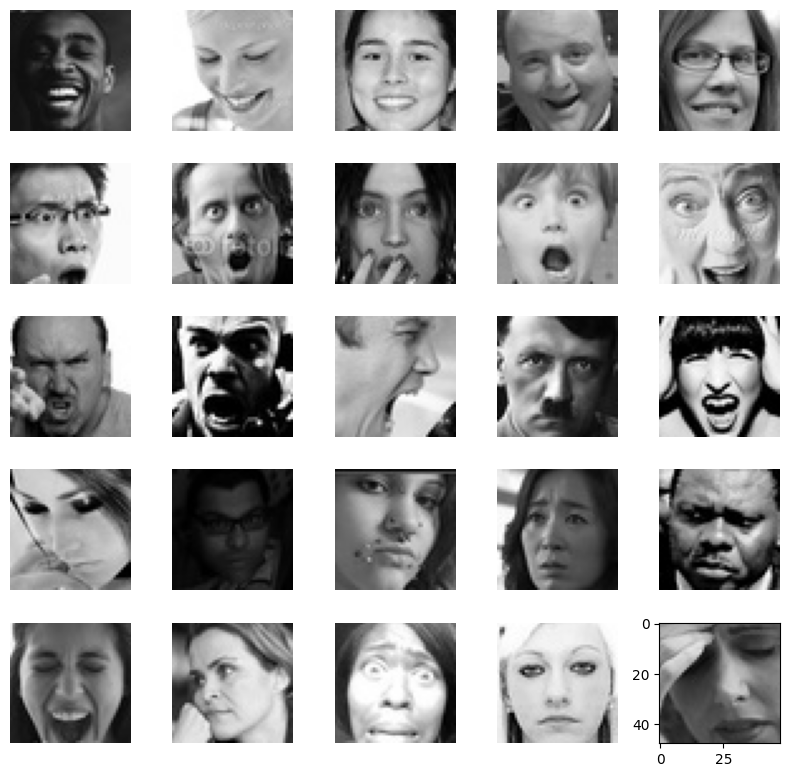

In [10]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/face_exp_data/img_data/"

plt.figure(0, figsize=(8,8))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    print(expression)
    for i in range(1,6):
        cpt = cpt + 1
        plt.axis('off')
        plt.subplot(5,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

Validatioin

happy
surprise
angry


<ipython-input-8-47b89936f458>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,cpt)


sad
fear


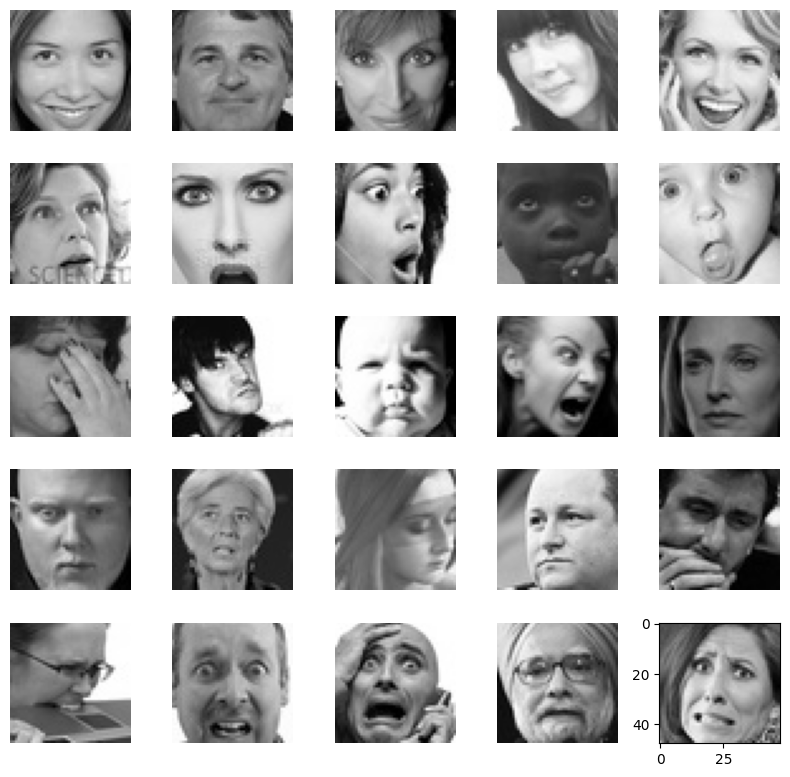

In [8]:
plt.figure(0, figsize=(8,8))
cpt = 0

for expression in os.listdir(base_path + "val/"):
    print(expression)
    for i in range(1,6):
        cpt = cpt + 1
        plt.axis('off')
        plt.subplot(5,5,cpt)
        img = load_img(base_path + "val/" + expression + "/" +os.listdir(base_path + "val/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

Test

happy
surprise
angry


<ipython-input-9-8288885d6581>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,cpt)


sad
fear


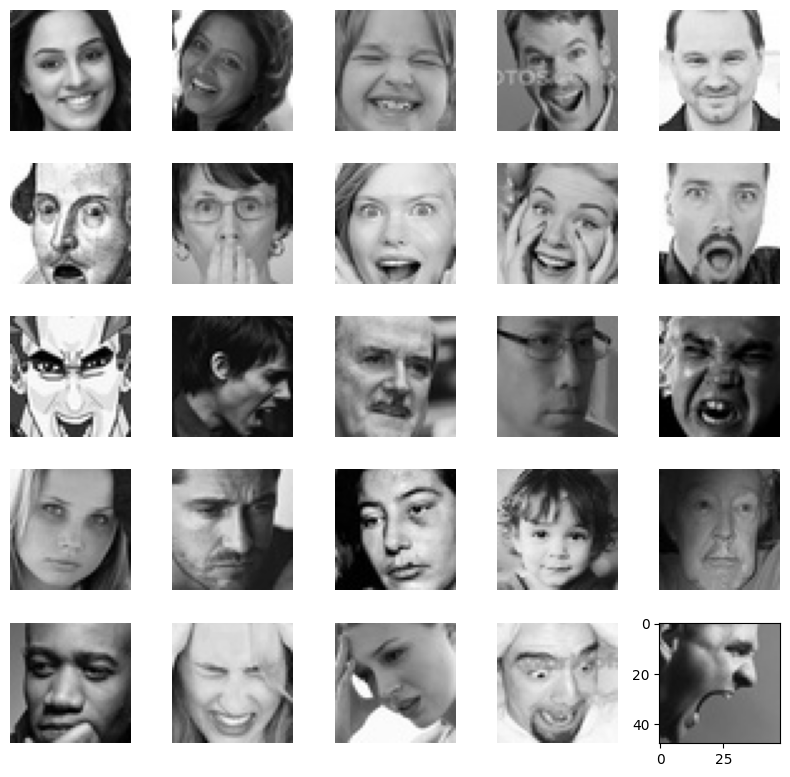

In [9]:
plt.figure(0, figsize=(8,8))
cpt = 0

for expression in os.listdir(base_path + "test/"):
    print(expression)
    for i in range(1,6):
        cpt = cpt + 1
        plt.axis('off')
        plt.subplot(5,5,cpt)
        img = load_img(base_path + "test/" + expression + "/" +os.listdir(base_path + "test/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [3]:
# !pip install split-folders

In [30]:
# %rm -rf data_4

In [4]:
# import splitfolders
# splitfolders.ratio("/content/images/images/validation", output="img_data", seed=1, ratio=(0, 0.5, 0.5), group_prefix=None)

Copying files: 5739 files [00:00, 7877.52 files/s]


In [ ]:
# !zip -r img_data.zip /content/img_data

In [3]:
len(os.listdir(base_path + "train/" + expression))

3205

### Visualization

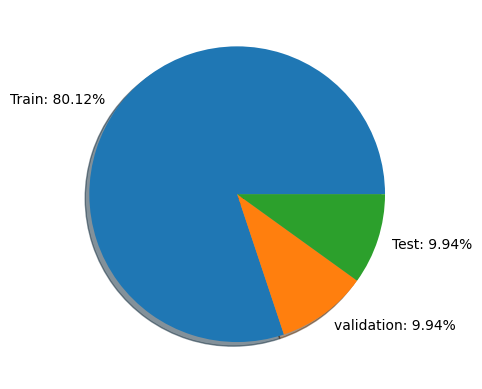

In [14]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([len(os.listdir(base_path + "train/" + expression)), len(os.listdir(base_path + "val/" + expression)), len(os.listdir(base_path + "test/" + expression))])
sets = ["Train: "+str(100*round(y[0]/sum(y), 4))+'%', "validation: "+str(100*round(y[1]/sum(y), 4))+'%', "Test: "+str(100*round(y[2]/sum(y), 4))+'%']

plt.pie(y, labels = sets, shadow = True)
plt.show()

In [15]:
# count number of train images for each expression
ex=[]
print('Train data:')
for expression in os.listdir(base_path + "train"):
  ex.append(len(os.listdir(base_path + "train/" + expression)))
  print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


Train data:
7164 happy images
3205 surprise images
3993 angry images
4938 sad images
4103 fear images


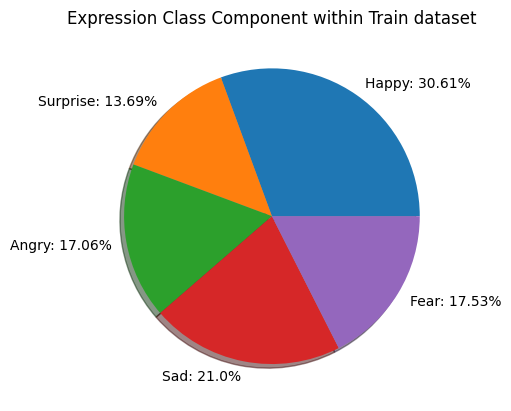

In [21]:
exp = ["Happy: "+str(100*round(ex[0]/sum(ex), 4))+'%', "Surprise: "+str(100*round(ex[1]/sum(ex), 4))+'%', "Angry: "+str(100*round(ex[2]/sum(ex), 4))+'%'
, "Sad: "+str(100*round(ex[3]/sum(ex), 2))+'%', "Fear: "+str(100*round(ex[4]/sum(ex), 4))+'%']
plt.title('Expression Class Component within Train dataset')
plt.pie(ex, labels = exp, shadow = True)
plt.show()

In [22]:
ex=[]
print('Validation data:')
for expression in os.listdir(base_path + "val"):
  ex.append(len(os.listdir(base_path + "val/" + expression)))
  print(str(len(os.listdir(base_path + "val/" + expression))) + " " + expression + " images")


Validation data:
912 happy images
398 surprise images
480 angry images
569 sad images
509 fear images


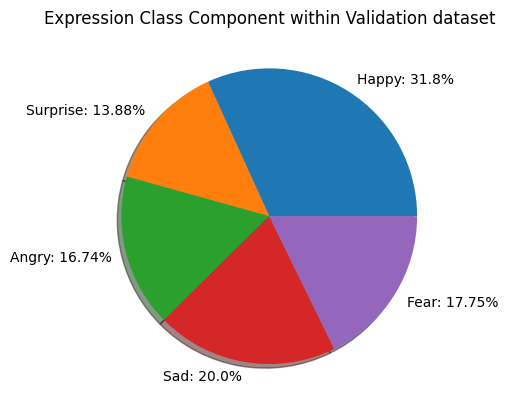

In [23]:
exp = ["Happy: "+str(100*round(ex[0]/sum(ex), 4))+'%', "Surprise: "+str(100*round(ex[1]/sum(ex), 4))+'%', "Angry: "+str(100*round(ex[2]/sum(ex), 4))+'%'
, "Sad: "+str(100*round(ex[3]/sum(ex), 2))+'%', "Fear: "+str(100*round(ex[4]/sum(ex), 4))+'%']
plt.title('Expression Class Component within Validation dataset')
plt.pie(ex, labels = exp, shadow = True)
plt.show()

In [70]:
ex=[]
print('Test data:')
for expression in os.listdir(base_path + "test"):
  ex.append(len(os.listdir(base_path + "test/" + expression)))
  print(str(len(os.listdir(base_path + "test/" + expression))) + " " + expression + " images")

Test data:
913 happy images
399 surprise images
480 angry images
570 sad images
509 fear images


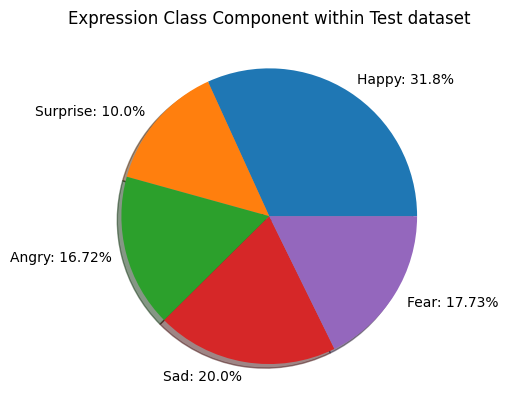

In [71]:
exp = ["Happy: "+str(100*round(ex[0]/sum(ex), 4))+'%', "Surprise: "+str(100*round(ex[1]/sum(ex), 1))+'%', "Angry: "+str(100*round(ex[2]/sum(ex), 4))+'%'
, "Sad: "+str(100*round(ex[3]/sum(ex), 2))+'%', "Fear: "+str(100*round(ex[4]/sum(ex), 4))+'%']
plt.title('Expression Class Component within Test dataset')
plt.pie(ex, labels = exp, shadow = True)
plt.show()

### Process

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
base_path = "/content/face_exp_data/img_data/"

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

test_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 23403 images belonging to 5 classes.
Found 2868 images belonging to 5 classes.
Found 2871 images belonging to 5 classes.


## Build a CNN and train

In [7]:
import tensorflow as tf

# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU available")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available")


GPU available


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(pic_size, pic_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Assuming 7 classes for facial expressions

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)        

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU  # Import LeakyReLU

# Your model and training code here

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.001
dropout_rate = 0.6

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 46, 46, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        1

## Hyperparameter tuning

Learning rate, dropout rate of conv layers, dropout rate of dense layer

In [7]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [5]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


In [6]:
def build_model(hp):
    model = Sequential()

    # Define the hyperparameters to tune
    dropout_conv = hp.Choice('dropout_conv', values=[0.2, 0.4])
    dropout_dense = hp.Choice('dropout_dense', values=[0.4, 0.5])
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0003, 0.0001])
    den = hp.Choice('den', values=[256,128,64])

    # Model architecture
    model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(64, (3, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(128, (3, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_conv))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_dense))

    model.add(Dense(den))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_dense))

    model.add(Dense(5, activation='softmax'))

    # Compile the model with tunable learning rate
    model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [30]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # combinations to try
    executions_per_trial=1,  # 1 model per trial
    directory='tune_hyper',  # save model state
    project_name='face_expression_classification'
)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Start the hyperparameter search
tuner.search(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0].values

Trial 30 Complete [00h 02m 34s]
val_accuracy: 0.6610878705978394

Best val_accuracy So Far: 0.6921199560165405
Total elapsed time: 02h 05m 08s


### Best model

In [34]:
print(f'Best Hyperparameters: {best_hyperparameters}')

Best Hyperparameters: {'dropout_conv': 0.4, 'dropout_dense': 0.5, 'learning_rate': 0.0003, 'den': 256}


In [ ]:
# !zip -r tune_hyper.zip /content/tune_hyper

## Evaluation

### Load model

In [ ]:
!unzip /content/tune_hyper.zip

In [8]:
# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # combinations to try
    executions_per_trial=1,  # 1 model per trial
    directory='content/tune_hyper',  # save model state
    project_name='face_expression_classification'
)

tuner.reload()

best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from content/tune_hyper/face_expression_classification/tuner0.json


### Learning curves

In [45]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.0003

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])


# Fit the best model with the entire training data to get the training curve
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
)

Epoch 1/50
183/183 [==============================] - 10s 35ms/step - loss: 1.9542 - accuracy: 0.3053 - val_loss: 1.3727 - val_accuracy: 0.4303
Epoch 2/50
183/183 [==============================] - 6s 34ms/step - loss: 1.4911 - accuracy: 0.3970 - val_loss: 1.2980 - val_accuracy: 0.4571
Epoch 3/50
183/183 [==============================] - 6s 34ms/step - loss: 1.3376 - accuracy: 0.4469 - val_loss: 1.2547 - val_accuracy: 0.4749
Epoch 4/50
183/183 [==============================] - 6s 34ms/step - loss: 1.2519 - accuracy: 0.4811 - val_loss: 1.1571 - val_accuracy: 0.5241
Epoch 5/50
183/183 [==============================] - 6s 33ms/step - loss: 1.2031 - accuracy: 0.5014 - val_loss: 1.1448 - val_accuracy: 0.5307
Epoch 6/50
183/183 [==============================] - 6s 34ms/step - loss: 1.1633 - accuracy: 0.5231 - val_loss: 1.2259 - val_accuracy: 0.5115
Epoch 7/50
183/183 [==============================] - 6s 34ms/step - loss: 1.1303 - accuracy: 0.5366 - val_loss: 1.1265 - val_accuracy: 0.541

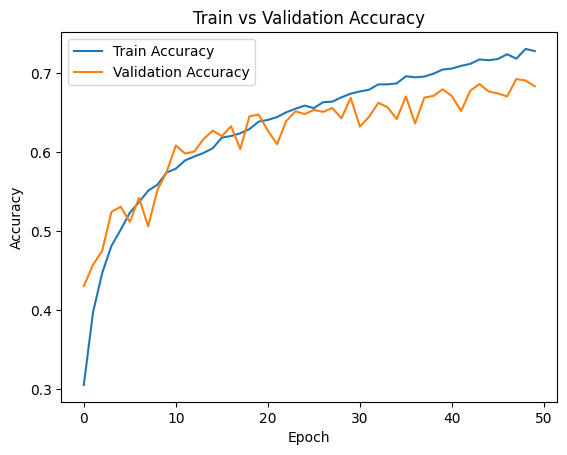

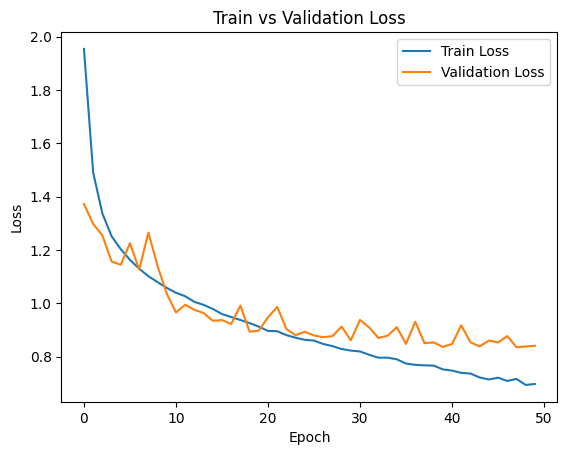

In [46]:
import matplotlib.pyplot as plt

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Plot training history
plt.title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Train accuracy

In [58]:
import warnings
warnings.filterwarnings("ignore")
best_hyperparameters = tuner.get_best_hyperparameters()[0].values
# accuracy of best model
accuracy = best_model.evaluate(train_generator)[1]
print(f'Best Model Train Accuracy: {accuracy:.4f}')
print(f'Best Hyperparameters: {best_hyperparameters}')

Best Model Train Accuracy: 0.7180
Best Hyperparameters: {'dropout_conv': 0.4, 'dropout_dense': 0.5, 'learning_rate': 0.0003, 'den': 256}


### Validation accuracy

In [51]:
# accuracy of best model
accuracy = best_model.evaluate(validation_generator)[1]
print(f'Best Model Validation Accuracy: {accuracy:.4f}')

23/23 [==============================] - 1s 33ms/step - loss: 0.8345 - accuracy: 0.6921
Best Model Validation Accuracy: 0.6921


### Test accuracy

In [32]:
accuracy = best_model.evaluate(test_generator)[1]
print(f'Best Model Test Accuracy: {accuracy:.4f}')

23/23 [==============================] - 1s 33ms/step - loss: 0.8150 - accuracy: 0.6910
Best Model Test Accuracy: 0.6910


### Confusion Matrix

23/23 [==============================] - 8s 30ms/step


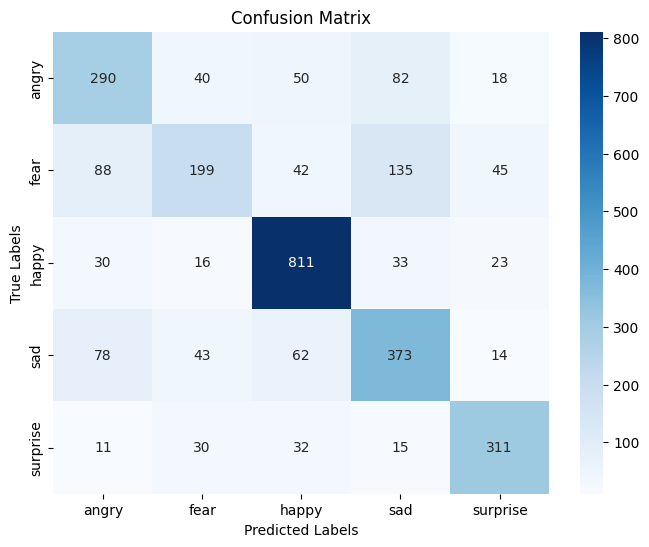

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions on the test set
test_predictions = best_model.predict(test_generator)
predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Performance on different classes

**0:angry; 1:fear; 2:happy; 3:sad; 4:surprise**

In [7]:
name_classes = ['angry', 'fear', 'happy', 'sad', 'surprise']

In [63]:
from sklearn.metrics import accuracy_score
# Evaluate the best model on the new test data
predictions = best_model.predict_generator(test_generator)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = test_generator.classes

# Calculate accuracy for each class
class_accuracies = {}
for class_label in range(test_generator.num_classes):
    indices_for_class = true_classes == class_label
    accuracy_for_class = accuracy_score(true_classes[indices_for_class], predicted_classes[indices_for_class])
    class_accuracies[class_label] = accuracy_for_class

# Print the accuracy for each class
for class_label, accuracy in class_accuracies.items():
    print(f"Class {name_classes[class_label]} Accuracy: {accuracy:.4f}")

<ipython-input-63-e9e1d7815204>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(test_generator)


Class angry Accuracy: 0.6042
Class fear Accuracy: 0.3910
Class happy Accuracy: 0.8883
Class sad Accuracy: 0.6544
Class surprise Accuracy: 0.7794


In [65]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print the major class of misclassification for each class
for class_label in range(test_generator.num_classes):
    # exclude true positives
    misclassifications = conf_matrix[class_label, :]
    misclassifications[class_label] = 0

    # major class of misclassification
    major_misclassification_class = np.argmax(misclassifications)

    print(f"Class {name_classes[class_label]} - Major Misclassification: {name_classes[major_misclassification_class]}")

Class angry - Major Misclassification: sad
Class fear - Major Misclassification: sad
Class happy - Major Misclassification: sad
Class sad - Major Misclassification: angry
Class surprise - Major Misclassification: happy


In [56]:
base_path = "/content/face_exp_data/img_data/"
for expression in os.listdir(base_path + "train"):

    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

7164 happy images
3993 angry images
4103 fear images
4938 sad images
3205 surprise images


## Performance on new and unseen data

In [60]:
!unzip /content/trump.zip

Archive:  /content/trump.zip
   creating: trump/
  inflating: __MACOSX/._trump        
   creating: trump/happy/
  inflating: trump/.DS_Store         
  inflating: __MACOSX/trump/._.DS_Store  
   creating: trump/sad/
   creating: trump/fear/
   creating: trump/surprise/
   creating: trump/angry/
  inflating: trump/happy/.DS_Store   
  inflating: __MACOSX/trump/happy/._.DS_Store  
  inflating: trump/happy/3_happy.png  
  inflating: __MACOSX/trump/happy/._3_happy.png  
  inflating: trump/sad/.DS_Store     
  inflating: __MACOSX/trump/sad/._.DS_Store  
  inflating: trump/sad/3_sad.png     
  inflating: __MACOSX/trump/sad/._3_sad.png  
  inflating: trump/fear/.DS_Store    
  inflating: __MACOSX/trump/fear/._.DS_Store  
  inflating: trump/surprise/.DS_Store  
  inflating: __MACOSX/trump/surprise/._.DS_Store  
  inflating: trump/angry/.DS_Store   
  inflating: __MACOSX/trump/angry/._.DS_Store  
  inflating: trump/angry/3_angry.png  
  inflating: __MACOSX/trump/angry/._3_angry.png  


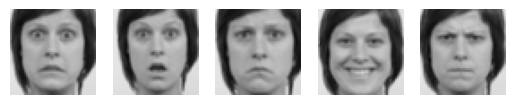

In [62]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/data_new/"

k=0
for expression in os.listdir(base_path):
    plt.subplot(1, 5, k+1)
    plt.axis('off')
    img = load_img('/content/data_new/'+expression+'/'+expression+'1.png')
    plt.imshow(img, cmap="gray")
    k+=1

plt.show()

In [63]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
newtest_generator = datagen_validation.flow_from_directory(base_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 5 images belonging to 5 classes.


In [64]:
accuracy = best_model.evaluate(newtest_generator)[1]
print(f'Accuracy on new model: {accuracy:.4f}')

1/1 [==============================] - 0s 36ms/step - loss: 0.6379 - accuracy: 0.8000
Accuracy on new model: 0.8000


In [65]:
# Evaluate the best model on the new test data
predictions = best_model.predict_generator(newtest_generator)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = newtest_generator.classes

# Print the predicted and true classes
for i in range(len(predicted_classes)):
    print(f"Sample {i + 1} - Predicted: {name_classes[predicted_classes[i]]}, True: {name_classes[true_classes[i]]}")


Sample 1 - Predicted: angry, True: angry
Sample 2 - Predicted: fear, True: fear
Sample 3 - Predicted: happy, True: happy
Sample 4 - Predicted: fear, True: sad
Sample 5 - Predicted: surprise, True: surprise


<ipython-input-65-a325a273b0fb>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(newtest_generator)


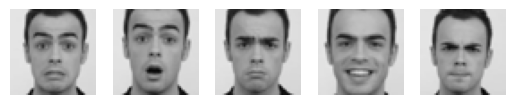

In [19]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/data_new2/"

k=0
for expression in os.listdir(base_path):
    plt.subplot(1, 5, k+1)
    img = load_img(base_path+expression+'/'+expression+'2.png')
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    k+=1

plt.show()

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
newtest_generator2 = datagen_validation.flow_from_directory(base_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 5 images belonging to 5 classes.


In [55]:
accuracy = best_model.evaluate(newtest_generator2)[1]
print(f'Accuracy on new model: {accuracy:.4f}')

1/1 [==============================] - 0s 37ms/step - loss: 0.8665 - accuracy: 0.6000
Accuracy on new model: 0.6000


In [56]:
# Evaluate the best model on the new test data
predictions = best_model.predict_generator(newtest_generator2)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = newtest_generator2.classes

# Print the predicted and true classes
for i in range(len(predicted_classes)):
    print(f"Sample {i + 1} - Predicted: {name_classes[predicted_classes[i]]}, True: {name_classes[true_classes[i]]}")

Sample 1 - Predicted: angry, True: angry
Sample 2 - Predicted: angry, True: fear
Sample 3 - Predicted: happy, True: happy
Sample 4 - Predicted: angry, True: sad
Sample 5 - Predicted: surprise, True: surprise


<ipython-input-56-64ed1036181d>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(newtest_generator2)


actual label: surprise
predicted label: surprise


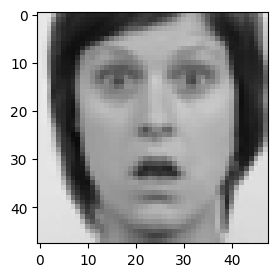

In [67]:
from IPython.display import clear_output
import time


for i in range(len(predicted_classes)):
  print(f"actual label: {name_classes[true_classes[i]]}")
  print(f"predicted label: {name_classes[predicted_classes[i]]}")
  img = load_img('/content/data_new/'+name_classes[i]+'/'+name_classes[i]+'1.png')
  plt.figure(figsize=(3,3))
  plt.imshow(img, cmap="gray")
  plt.show()
  time.sleep(2)
  clear_output(wait=True)

## Example from test set

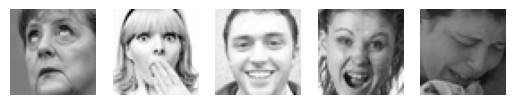

In [18]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/data_new3/"

k=0
for expression in os.listdir(base_path):
    plt.subplot(1, 5, k+1)
    plt.axis('off')
    img = load_img('/content/data_new3/'+expression+'/'+expression+'3.jpg')
    plt.imshow(img, cmap="gray")
    k+=1

plt.show()

In [10]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
newtest_generator3 = datagen_validation.flow_from_directory(base_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 13 images belonging to 5 classes.


In [15]:
accuracy = best_model.evaluate(newtest_generator3)[1]
print(f'Accuracy on new model: {accuracy:.4f}')

1/1 [==============================] - 7s 7s/step - loss: 0.8495 - accuracy: 0.6000
Accuracy on new model: 0.6000


In [17]:
# Evaluate the best model on the new test data
predictions = best_model.predict_generator(newtest_generator3)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = newtest_generator3.classes

# Print the predicted and true classes
for i in range(len(predicted_classes)):
    print(f"Sample {i + 1} - Predicted: {name_classes[predicted_classes[i]]}, True: {name_classes[true_classes[i]]}")

<ipython-input-17-bcc3c7cacc28>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(newtest_generator3)


Sample 1 - Predicted: fear, True: angry
Sample 2 - Predicted: angry, True: fear
Sample 3 - Predicted: happy, True: happy
Sample 4 - Predicted: sad, True: sad
Sample 5 - Predicted: surprise, True: surprise


In [ ]:
# base_path = "/content/face_exp_data/img_data/"
# for expression in os.listdir(base_path + "train"):

#     print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

In [ ]:
# train_generator.classes

In [ ]:
# unique, counts = np.unique(train_generator.classes, return_counts=True)

# dict(zip(unique, counts))


## Extra new test

In [61]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
# number of images to feed into the NN for every batch
# size of the image: 48*48 pixels
pic_size = 48
batch_size = 128
base_path='/content/trump/'
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
newtest_generator5 = datagen_validation.flow_from_directory(base_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 3 images belonging to 5 classes.


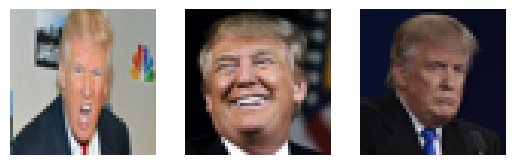

In [67]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/trump/"

k=0
for expression in name_classes:
  for file_name in os.listdir(base_path+expression):
    plt.subplot(1, 3, k+1)
    plt.axis('off')
    img = load_img('/content/trump/'+expression+'/'+file_name)
    plt.imshow(img, cmap="gray")
    k+=1

plt.show()

In [62]:
accuracy = best_model.evaluate(newtest_generator5)[1]
print(f'Accuracy on new model: {accuracy:.4f}')

1/1 [==============================] - 0s 116ms/step - loss: 0.6179 - accuracy: 0.6667
Accuracy on new model: 0.6667


In [63]:
name_classes = ['angry', 'fear', 'happy', 'sad', 'surprise']
# Evaluate the best model on the new test data
predictions = best_model.predict_generator(newtest_generator5)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = newtest_generator5.classes

# Print the predicted and true classes
for i in range(len(predicted_classes)):
    print(f"Sample {i + 1} - Predicted: {name_classes[predicted_classes[i]]}, True: {name_classes[true_classes[i]]}")

Sample 1 - Predicted: fear, True: angry
Sample 2 - Predicted: happy, True: happy
Sample 3 - Predicted: sad, True: sad


In [59]:
# from IPython.display import clear_output
# import time
# import numpy as np
# import seaborn as sns
# from keras.preprocessing.image import load_img, img_to_array
# import matplotlib.pyplot as plt
# import os
# name_classes = ['angry', 'fear', 'happy', 'sad', 'surprise']
# k=0
# for expression in name_classes:
#   for file_name in os.listdir(base_path+expression):
#     print(f"actual label: {name_classes[true_classes[k]]}")
#     print(f"predicted label: {name_classes[predicted_classes[k]]}")
#     img = load_img('/content/data_6/'+expression+'/'+file_name)
#     plt.figure(figsize=(3,3))
#     plt.imshow(img, cmap="gray")
#     plt.show()
#     time.sleep(2)
#     clear_output(wait=True)
#     k+=1
